<a href="https://colab.research.google.com/github/moha2077/AttachedBlindRuntimeerror/blob/master/cifar_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning week - Day 3 - CIFAR Classification

### Exercise objectives
- Implement a CNN for a 10-class classification problem
- Enhance the CNN performance with data augmentation techniques
- Experiment the limitations of training network with large images on your computer (more especially on your CPU)

<hr>
<hr>

You should now have a better feeling of how a CNN is working, and especially how the convolutions are affecting the image to detect specific features. Therefore, let's now play with a bit more complex images. The CIFAR-10 dataset is a dataset that contains images of 10 different classes : 
- airplane 										
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck

This dataset is emblematic in the research community as many enhancements for image problems have been achieved on this dataset, and later on the CIFAR-100 dataset once the performance got too high. You can check the [wikipedia](https://en.wikipedia.org/wiki/CIFAR-10) page of the dataset if you want to know more about it.

In this notebook, we propose to implement a CNN to distinguish the 10 categories from the CIFAR-10 dataset. Again, remember that until 10 years ago, this problem was very challenging to the entire research community and is now for you to tackle.


⚠️ **Warning** ⚠️ In this exercise, computations are done on your computer, and most probably on your CPU. Therefore, bear in mind that a model training will take ~10 minutes on the entire dataset. You will here experiment the fact that these computations are heavy and requires a lot of computational power. We will see in the next exercise how to overcome this problem. Until then, there is a trick that you can use in any ML problem if you are still in the experimental / design part but face long waiting times : select a subset of your data (for instance `X_train = X_train[:100]`) to code all the different parts without taking care of the performance. Once the code is ready, you can seek for performance by taking the entire dataset.



# Data

❓ **Question** ❓ To load the CIFAR-10 dataset you can use `keras` package directly (see [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10)). What is the shape of the images? How many images do you have per class?

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(X_train, labels_train), (X_test, labels_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# YOUR CODE HERE
X_train.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_train.min()

0

In [ ]:
labels_train.max()

9

In [ ]:
import pandas as pd
pd.DataFrame(labels_train).value_counts()


9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
dtype: int64

❓ **Question** ❓ To ease the convergence of the algorithm, it is usefull to normalize the data. See here what are the maximum and minimum values in your data, and normalize it accordingly (the resulting image intensities should be between 0 and 1).

In [ ]:
# YOUR CODE HERE
X_train = X_train/255
X_test = X_test/255

❓ **Question** ❓ Display some of the images and their relative class. You can use the `imshow` function from matplotlib.

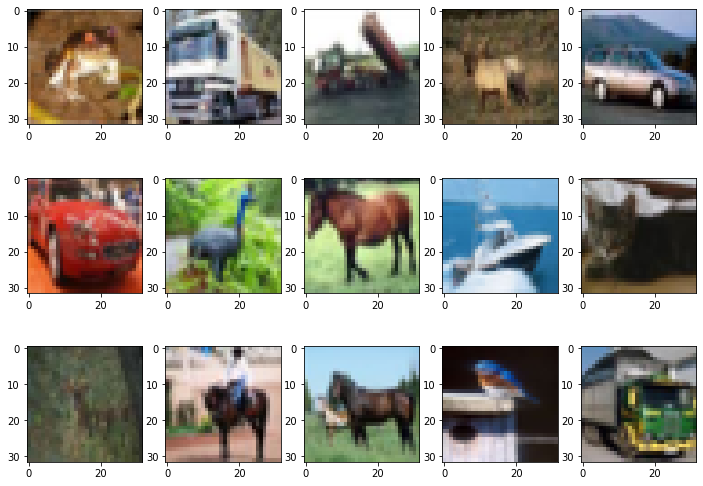

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,15))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')

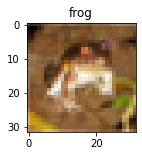

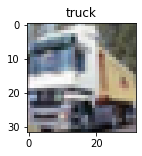

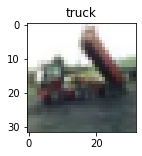

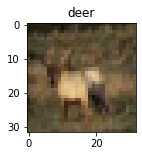

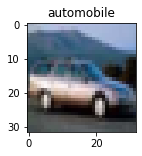

In [ ]:
##############
### Answer ###
##############

import matplotlib.pyplot as plt
%matplotlib inline

for i in range(5):
    img = X_train[i]
    label = labels_train[i][0]
    
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.title(labels[label])
    plt.show()

❓ **Question** ❓ The labels (`labels_train` and `labels_test`) are stored as list of integers. Convert it to one-hot encoded labels so that they can be used to train a classification neural network. You can use the `to_categorical` function from Keras. Store the the categories in `y_train` and `y_test`.

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(labels_train)
y_test = to_categorical(labels_test)

# Convolutional Neural Network

Now, let's define the Convolutional Neural Network. 

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task
 
 ⚠️ **Warning** ⚠️  Do not include the compilation in the function.
 
 ⚠️ **Warning** ⚠️ Do not forget to add the input shape of your data to the first layer. And do not forget that it has three colors ;)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

def initialize_model():
    model = models.Sequential()

    ### First convolution & max-pooling
    # YOUR CODE HERE
    model.add(layers.Conv2D(32, (3,3),input_shape=(32, 32, 3), activation='relu'
    ,padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (3,3),padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(128,(3,3),padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    

    ### Flattening
    # YOUR CODE HERE
    model.add(layers.Flatten())

    ### One fully connected
    # YOUR CODE HERE
    model.add(layers.Dense(120,activation='relu'))
    model.add(layers.Dense(60,activation='relu'))
    #dropout layer
    model.add(layers.Dropout(rate=0.5))
    

    ### Last layer (let's say a classification with 10 output)
    # YOUR CODE HERE
    model.add(layers.Dense(10, activation='softmax'))
    return model

❓ **Question** ❓ What is the number of parameters of your model? 

<details>
   <summary>If you don't remember how to check the number of parameters, click >>here<<</summary>
    `model.summary()`
</details>




In [ ]:
# YOUR CODE HERE
model = initialize_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

❓ **Question** ❓ Write a function to compile your model. 

In [ ]:
def compile_model(model):
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

❓ **Question** ❓ Compile your model and fit it on your training data, with an early stopping (patience to 5 to keep fast computations).

Store the output of the fit in an `history` variable.

In [ ]:
# YOUR CODE HERE
from tensorflow.keras.callbacks import EarlyStopping
model =initialize_model()
model = compile_model(model)
es = EarlyStopping(monitor='val_accuracy',mode='max',patience = 5, restore_best_weights=True)
history = model.fit(X_train,
                    labels_train,
                    validation_data = (X_test,labels_test),
                    batch_size = 32,
                    epochs = 500,
                    callbacks = es)

Epoch 1/500
1563/1563 [==============================] - 12s 3ms/step - loss: 1.8593 - accuracy: 0.3127 - val_loss: 1.2153 - val_accuracy: 0.5594
Epoch 2/500
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2610 - accuracy: 0.5562 - val_loss: 1.0677 - val_accuracy: 0.6207
Epoch 3/500
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0490 - accuracy: 0.6397 - val_loss: 0.9555 - val_accuracy: 0.6768
Epoch 4/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9216 - accuracy: 0.6911 - val_loss: 0.9045 - val_accuracy: 0.6921
Epoch 5/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8233 - accuracy: 0.7219 - val_loss: 0.8722 - val_accuracy: 0.7101
Epoch 6/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7488 - accuracy: 0.7477 - val_loss: 0.8595 - val_accuracy: 0.7206
Epoch 7/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6785 - accuracy: 0.7726 - val_loss: 0.9032 - val_a

In [ ]:
history.history

{'accuracy': [0.41047999262809753,
  0.5778800249099731,
  0.6462000012397766,
  0.6915599703788757,
  0.7200199961662292,
  0.7464799880981445,
  0.767300009727478,
  0.7860599756240845,
  0.8009200096130371,
  0.815500020980835,
  0.827239990234375,
  0.8400599956512451,
  0.8494799733161926,
  0.8586999773979187,
  0.8682000041007996,
  0.8755599856376648,
  0.8816199898719788],
 'loss': [1.6203151941299438,
  1.2171403169631958,
  1.0352818965911865,
  0.9224398732185364,
  0.829069197177887,
  0.7531114220619202,
  0.6942039132118225,
  0.6351394653320312,
  0.5914396643638611,
  0.5464893579483032,
  0.5090462565422058,
  0.4725678265094757,
  0.443683385848999,
  0.4184877872467041,
  0.39032357931137085,
  0.37069204449653625,
  0.3503420650959015],
 'val_accuracy': [0.5594000220298767,
  0.6207000017166138,
  0.676800012588501,
  0.6920999884605408,
  0.710099995136261,
  0.7206000089645386,
  0.7233999967575073,
  0.7286999821662903,
  0.7315999865531921,
  0.7188000082969666

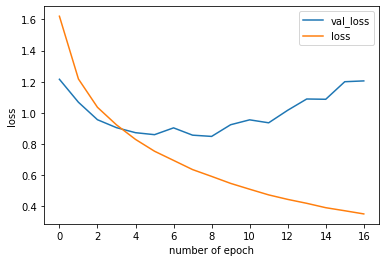

Text(0, 0.5, 'accuracy')

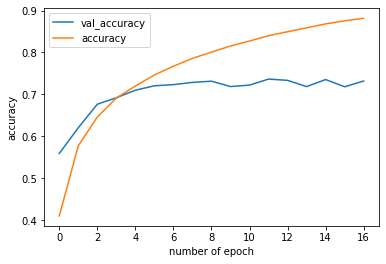

In [ ]:
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.xlabel('number of epoch')
plt.ylabel('accuracy')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fac01e28ad0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fac01df0c50>)

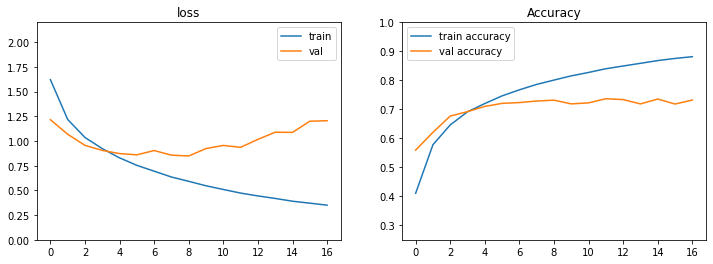

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

# YOUR CODE HERE
plot_history(history, title='', axs=None, exp_name="")

❓ **Question** ❓ Run the following function on the previous history (keep the default arguments, these are intended for future plots in the notebook).

❓ **Question** ❓ Evaluate your model on the test data. Are you satisfied with these performances ? What is the chance level on this task ?

In [ ]:
# YOUR CODE HERE
print(model.evaluate(X_test,labels_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.9357 - accuracy: 0.7366
[0.9357417225837708, 0.7365999817848206]


# Data augmentation

To easily improve the accuracy of a model without much work, we can generate new data: the _data augmentation_. This widely used technique consists in applying little transformation to input images without changing its label, as mirroring, cropping, intensity changes, etc. The improved performance simply results from the Neural network training with more different data.

The natural way to generate these new images is to apply some transformations and train the model on the original and new images. However, such procedure requires to keep all these images in memory : it can be very intensive, to the point that your computer memory cannot hold any new image (your computer might even crash).

For this reason, we will augment the data _on the fly_, meaning that we will create new data, use them to fit the model, then delete them. Here, Keras is our friend as it provides the utils to do all this job for us. Look at the following code : the general writing can seem odd but don't be panicked: just look at the function arguments that defines the augmentation techniques that we will use and that you can check in the  [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=(0.8, 1.2),) 

datagen.fit(X_train)

You can vizualize the input image and the transformed one with the following code:

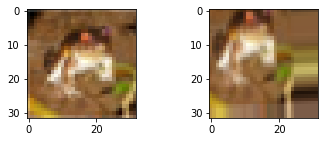

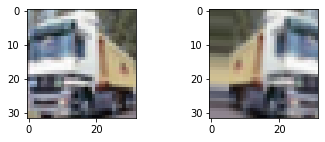

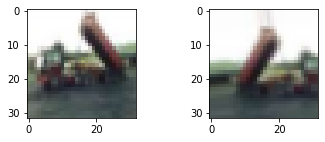

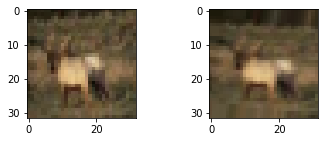

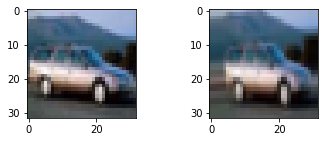

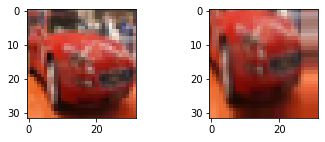

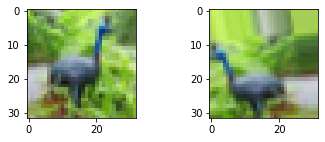

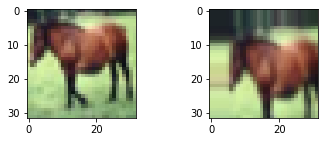

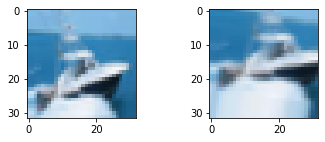

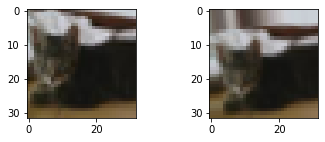

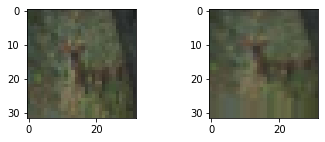

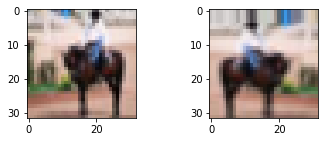

In [ ]:
import numpy as np

X_augmented = datagen.flow(X_train, shuffle=False, batch_size=1)

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()
    
    if i > 10:
        break

❗ **Remark** ❗ In this example, there is one augmented image per initial image. In fact, it is possible to have many augmented images per initial image.

❓ **Question** ❓ Previously, we used the `validation_split` argument to let the model separate a training set from the validation one. It is not possible here as using an image in the training set and its transformation in the validation set is considered as a data leakage. Therefore, we have to manually define the `validation_data` with the following commands:

In [ ]:
def initialize_model_2():
    model = models.Sequential()

    ### First convolution & max-pooling
    # YOUR CODE HERE
    model.add(layers.Conv2D(32, (3,3),input_shape=(32, 32, 3), activation='relu'
    ,padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (3,3),padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(128,(3,3),padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    

    ### Flattening
    # YOUR CODE HERE
    model.add(layers.Flatten())

    ### One fully connected
    # YOUR CODE HERE
    model.add(layers.Dense(120,activation='relu'))
    model.add(layers.Dense(60,activation='relu'))
    #dropout layer
    model.add(layers.Dropout(rate=0.5))
    

    ### Last layer (let's say a classification with 10 output)
    # YOUR CODE HERE
    model.add(layers.Dense(10, activation='softmax'))
    return model
def compile_model_2(model):
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  return model

In [31]:
# The model
model_2 = initialize_model()
model_2 = compile_model_2(model_2)

# The data generator
X_tr = X_train[:40000]
y_tr = y_train[:40000]
X_val = X_train[40000:]
y_val = y_train[40000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size=32)

# The early stopping criterion
es = EarlyStopping(patience=5)

# The fit
history_2 = model_2.fit(train_flow, 
                        epochs=100, 
                        callbacks=[es], 
                        validation_data=(X_val, y_val))


Epoch 1/100
1250/1250 [==============================] - 22s 17ms/step - loss: 2.0132 - accuracy: 0.2474 - val_loss: 1.5861 - val_accuracy: 0.4389
Epoch 2/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.6372 - accuracy: 0.4101 - val_loss: 1.2663 - val_accuracy: 0.5443
Epoch 3/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.5070 - accuracy: 0.4652 - val_loss: 1.1491 - val_accuracy: 0.5957
Epoch 4/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.4121 - accuracy: 0.5068 - val_loss: 1.1433 - val_accuracy: 0.5844
Epoch 5/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.3446 - accuracy: 0.5283 - val_loss: 1.0134 - val_accuracy: 0.6393
Epoch 6/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2915 - accuracy: 0.5514 - val_loss: 1.0788 - val_accuracy: 0.6141
Epoch 7/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2543 - accuracy: 0.5692 - val_loss: 1

### Remark: The training can be quite long here. You can go to the next exercise and gome back once in a while to finish the last questions

❓ **Question** ❓ Now, let's plot the previous and current run histories. What do you think of the data augmentation?

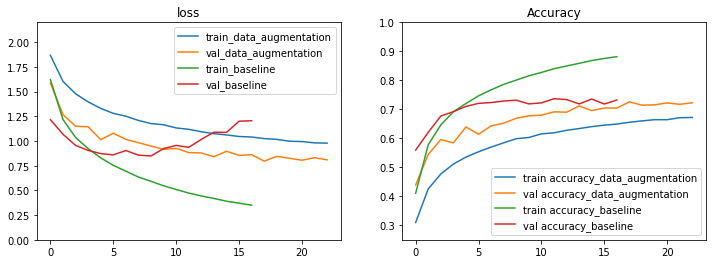

In [32]:
axs = plot_history(history_2, exp_name='data_augmentation')
plot_history(history ,axs=axs, exp_name='baseline')
plt.show()

❓ **Question** ❓ Evaluate the model on the test data. Do you see an improvement ?

In [34]:
# YOUR CODE HERE
print(model_2.evaluate(X_val,y_val))

313/313 [==============================] - 1s 2ms/step - loss: 0.8092 - accuracy: 0.7229
[0.8092308640480042, 0.7228999733924866]


##  Remark

One thing you have probably noticed in this notebook is that the training is quite long. This is the reason why we stopped training quickly to still have somehow fast experiments. However, in practice, training must be allowed to last longer, with a a stopping criterion that has a lower delta and higher patience!

How can we do that?  Actually, when you run the notebook on your compute, you train the neural network on your CPU. However, training neural network on images (in each batch) can be parallelized, and this parallelization procedure can be done on GPU.

First, you might face the fact that you don't have a GPU on your computer. Bur more importantly, it can be hard to set up the training on the GPU as it requires special hardware, software and sometimes OS. Therefore, we will look at another way to train our CNN on GPU (for free): Google Colab!